Finding the exposure times for e140m data


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from scipy.interpolate import interpolate
from craftroom import resample
import stistools
from astropy.convolution import convolve, Box1DKernel
from astropy.modeling import models, fitting
from scipy.io.idl import readsav


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20


/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/stsci/tools/nmpfit.py:10: UserWarning: NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.
  warnings.warn("NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.")
/home/david/anaconda3/envs/astroconda/lib/python3.6/site-packages/stsci/tools/gfit.py:20: UserWarning: GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it.Use astropy.modeling instead.
  warnings.warn("GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it."


The following tasks in the stistools package can be run with TEAL:
   basic2d      calstis     ocrreject     wavecal        x1d          x2d


In [4]:
x1dpath = '/media/david/1tb_storage1/emergency_data/mega_muscles/e140m_fits/'
x1ds = glob.glob('{}*x1d.fits'.format(x1dpath))
savs = glob.glob('ayres_e140m/*.sav')
print(x1ds)
print(savs)

['/media/david/1tb_storage1/emergency_data/mega_muscles/e140m_fits/odlm08030_x1d.fits', '/media/david/1tb_storage1/emergency_data/mega_muscles/e140m_fits/odlm08040_x1d.fits', '/media/david/1tb_storage1/emergency_data/mega_muscles/e140m_fits/odlm08050_x1d.fits', '/media/david/1tb_storage1/emergency_data/mega_muscles/e140m_fits/odlm08060_x1d.fits', '/media/david/1tb_storage1/emergency_data/mega_muscles/e140m_fits/odlm09030_x1d.fits', '/media/david/1tb_storage1/emergency_data/mega_muscles/e140m_fits/odlm09050_x1d.fits', '/media/david/1tb_storage1/emergency_data/mega_muscles/e140m_fits/odlm09060_x1d.fits', '/media/david/1tb_storage1/emergency_data/mega_muscles/e140m_fits/odlm09040_x1d.fits', '/media/david/1tb_storage1/emergency_data/mega_muscles/e140m_fits/odlm37060_x1d.fits', '/media/david/1tb_storage1/emergency_data/mega_muscles/e140m_fits/odlm37050_x1d.fits', '/media/david/1tb_storage1/emergency_data/mega_muscles/e140m_fits/odlm37030_x1d.fits', '/media/david/1tb_storage1/emergency_data/

In [5]:
readsav(savs[0])

{'wave': array([1140.55729632, 1140.56962002, 1140.58194347, ..., 1709.4639857 ,
        1709.48204626, 1709.50010647]),
 'flux': array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.4734863e-15,
        1.3332343e-15, 2.3965514e-15], dtype=float32),
 'photerr': array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.9418730e-15,
        5.7681597e-15, 8.0248452e-15], dtype=float32),
 'epsilon': array([500, 500, 500, ...,   0,   0,   0], dtype=int16),
 'texpt': array([    0.   ,     0.   ,     0.   , ..., 15200.063, 15200.063,
         9725.782], dtype=float32),
 'xorder': array([129., 129., 129., ...,  87.,  87.,  87.]),
 'total_texps': 15200.063,
 'total_counts': 139907.4}

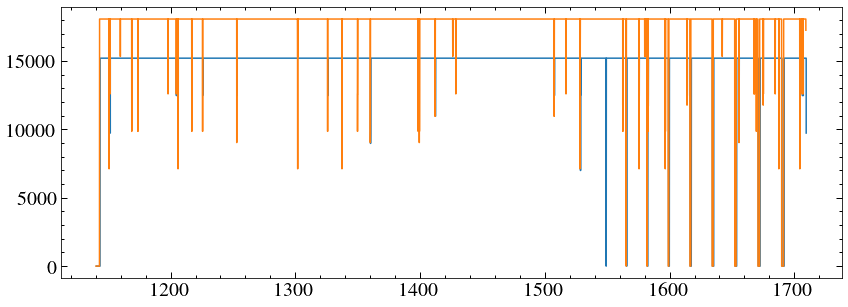

In [7]:
for sav in savs:
    data = readsav(sav)
    plt.plot(data['wave'], data['texpt'])

In [8]:
newfits = glob.glob('e140m_test/*.fits')
print(newfits)

['e140m_test/hlsp_muscles_hst_stis_gj729_e140m_v2_component-spec.fits', 'e140m_test/hlsp_muscles_hst_stis_gj15a_e140m_v2_component-spec.fits']


In [17]:
hdul = fits.open(newfits[1])

In [18]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TELESCOP= 'HST     '                                                            
INSTRUME= 'STIS    '                                                            
GRATING = 'E140M   '                                                            
APERTURE= '0.2X0.2 '                                                            
TARGNAME= 'GJ15A   '                                                            
RA_TARG =       4.616640366617                                                  
DEC_TARG=       44.02506857788                                                  
PROPOSID=                15071                                                  
HLSPNAME= 'Measurements of t